<a href="https://colab.research.google.com/github/mswetha44/Machine-learning-projects/blob/main/credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all Libraries

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('/content/credit_customers.csv')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


Explaining all the attributes


* checking_status:Status of existing checking account

*  duration:Duration in months

*  credit_history:credits taken, paid back duly, delays, critical accounts

*   purpose:Purpose of the credit

*   credit_amount:Amount of credit

*   savings_status:Status of savings account/bond

*   employement:Present employment, in number of years
*   installement_commitment:Installment rate in percentage of disposable income


*   personal status:sex and marital data


*   other_parties:Other debtors / guarantors









In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
df.checking_status.unique()

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

In [ ]:
df.savings_status.unique()

array(['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500'],
      dtype=object)

In [ ]:
df.employment.unique()

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

In [ ]:
df.checking_status = df.checking_status.map({"<0":1,"0<=X<200":2,"no checking":3,">=200":4})
df.savings_status = df.savings_status.map({"no known savings":1,"<100":2,"500<=X<1000":3,">=1000":4,"100<=X<500":5})
df.employment = df.employment.map({">=7":1,"1<=X<4":2,"4<=X<7":3,"unemployed":4,"<1":5})


In [ ]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,critical/other existing credit,radio/tv,1169.0,1,1,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,2,48.0,existing paid,radio/tv,5951.0,2,2,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,3,12.0,critical/other existing credit,education,2096.0,2,3,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,1,42.0,existing paid,furniture/equipment,7882.0,2,3,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,1,24.0,delayed previously,new car,4870.0,2,2,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


Checking duplicates

In [ ]:
df.duplicated()

Duplicate Rows :  0


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class


<ipython-input-11-800a3e64ac65>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')


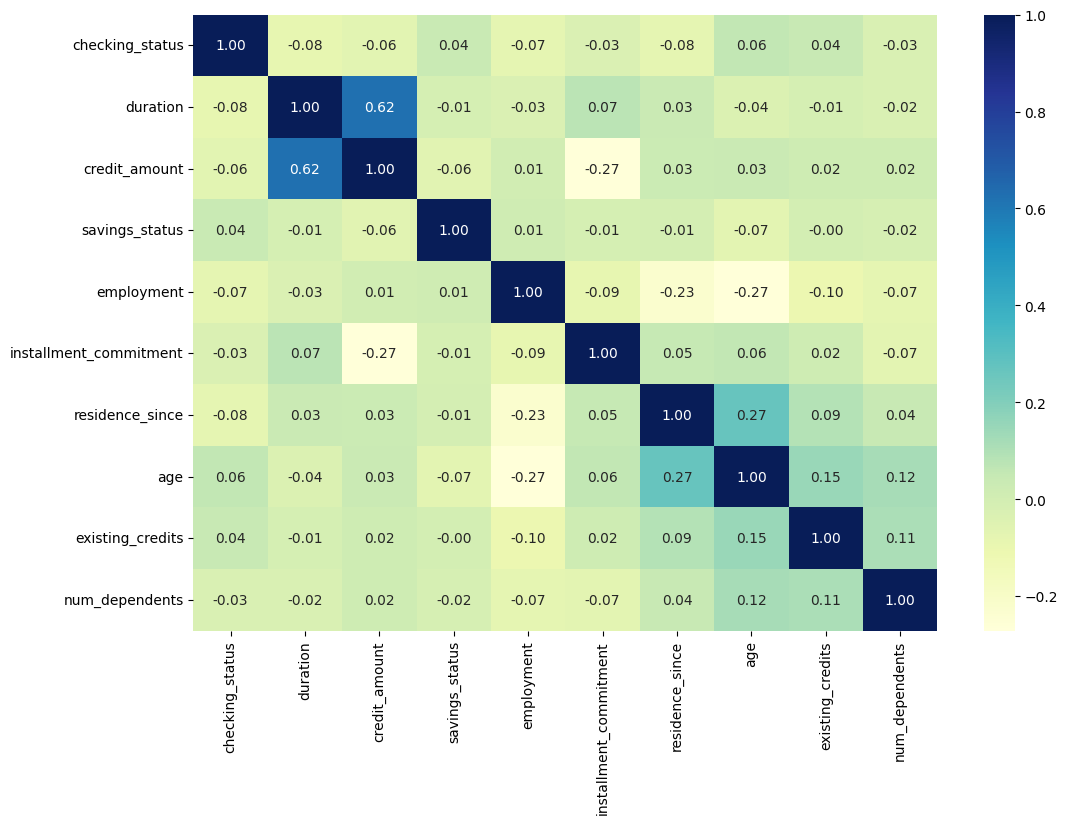

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')
   # Show the plot
plt.show()

In [ ]:
# Verify the types of data in the  df
df.dtypes.value_counts()

object     11
float64     7
int64       3
dtype: int64

In [ ]:
# Create list of object columns for conversion
object_columns=[]
for col in df.columns:
    if (df[col].dtype=="object"):
        object_columns.append(col)
print(object_columns)

['credit_history', 'purpose', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']


In [ ]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['credit_history', 'purpose', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df['class'].value_counts()

1    700
0    300
Name: class, dtype: int64

Setting the Target

In [ ]:
#x is the input features
x = np.array(df.drop(['class'],1))

<ipython-input-16-aa97523204e5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['class'],1))


In [ ]:
#y is the target
y = np.array(df['class'])

Splitting the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train[0]

NameError: name 'X_train' is not defined

In [ ]:
#Data pre processing scaling input features x
from sklearn import preprocessing
# ________Scaling the Features________________

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

MODELS

BEFORE SMOTE

LogisticRegression

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for LR is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for LR is: 76.0
Confusion Matrix
[[ 22  37]
 [ 11 130]]


Balancing Using Class Weights Technique

In [ ]:
lr = LogisticRegression(class_weight={0: 0.06467336683417085, 1: 0.9353266331658292})
lr.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for LR is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for LR is: 76.0
Confusion Matrix
[[ 22  37]
 [ 11 130]]


Applying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for LR is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for LR is: 81.07142857142857
Confusion Matrix
[[110  25]
 [ 28 117]]


Ada Boost Classifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for ADA is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for ADA is: 76.5
Confusion Matrix
[[ 28  31]
 [ 16 125]]


Applying Smote technique to balance and running Ada Boost Classifier

In [ ]:
sm = SMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for Ada is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for Ada is: 86.07142857142858
Confusion Matrix
[[114  21]
 [ 18 127]]


SVM

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for SVM is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for SVM is: 71.5
Confusion Matrix
[[  3  56]
 [  1 140]]


SVM AFTER SMOTE

In [ ]:
sm = SMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for SVM is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for SVM is: 78.78787878787878
Confusion Matrix
[[68 15]
 [20 62]]


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10,random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for DecisionTree is:", accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for DecisionTree is: 70.0
Confusion Matrix
[[ 28  31]
 [ 29 112]]


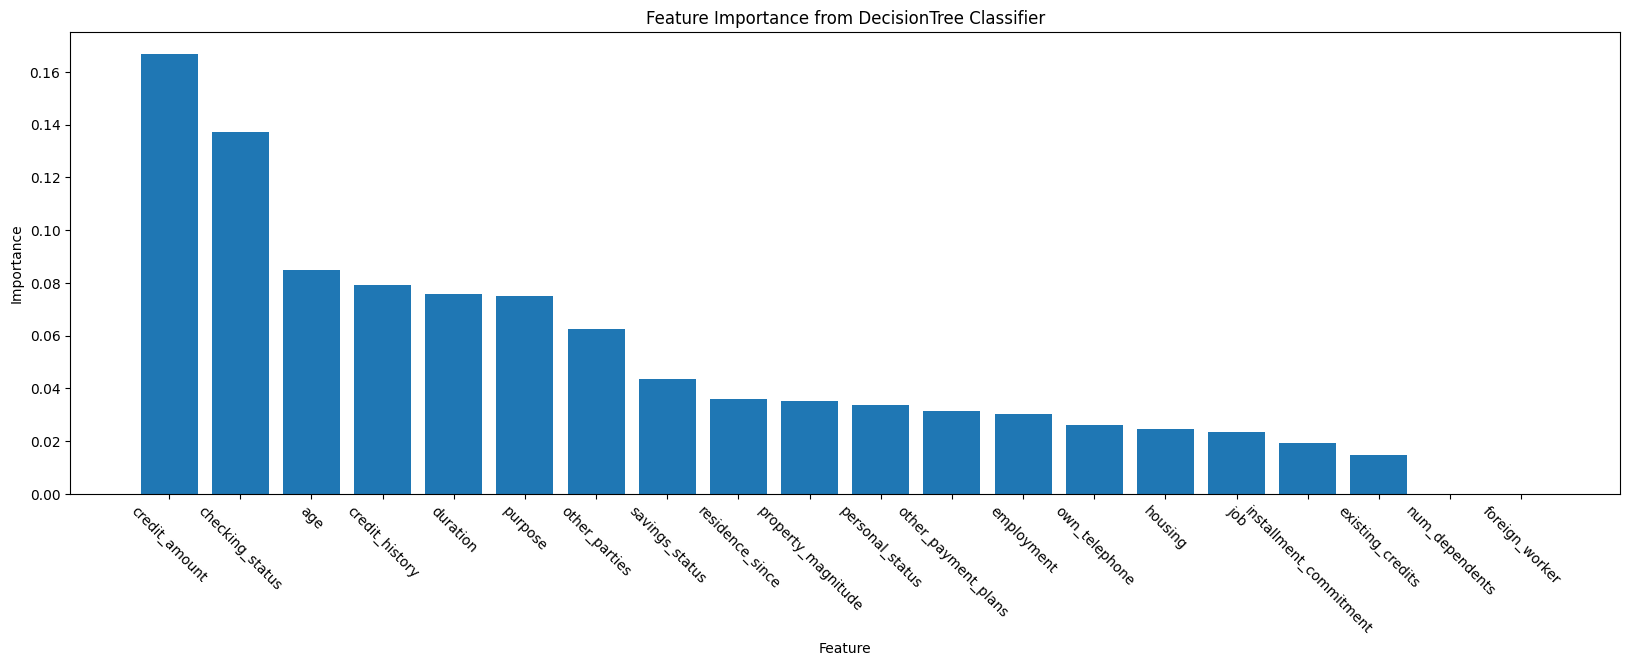

In [ ]:
feature_importances = clf.feature_importances_
feature_names = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment', 'installment_commitment',
       'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(20, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=-45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance from DecisionTree Classifier")
plt.show()

Random ForestClassifier

Accuracy = 0.78
Recall = 0.94



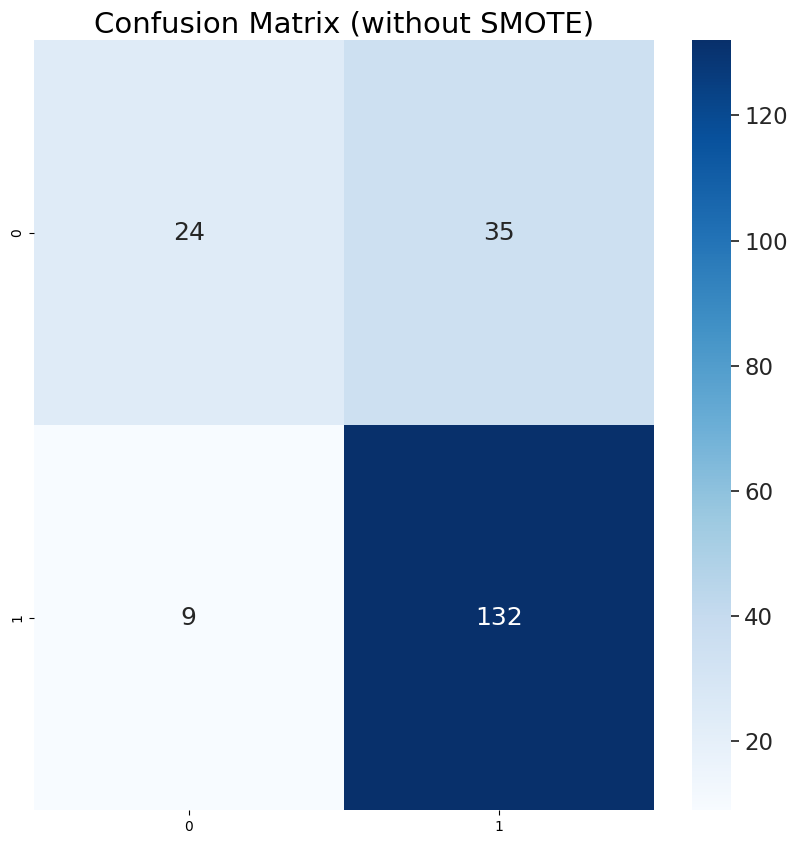

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(n_estimators=50,random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(10, 10))
plt.title('Confusion Matrix (without SMOTE)', size=21)
sns.set(font_scale=1.5)

sns.heatmap(cm, annot=True, cmap='Blues', fmt="g");

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Printing the results
print("Accuracy for RandomForestClassifier is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)




Accuracy for RandomForestClassifier is: 81.07142857142857
Confusion Matrix
[[110  25]
 [ 28 117]]


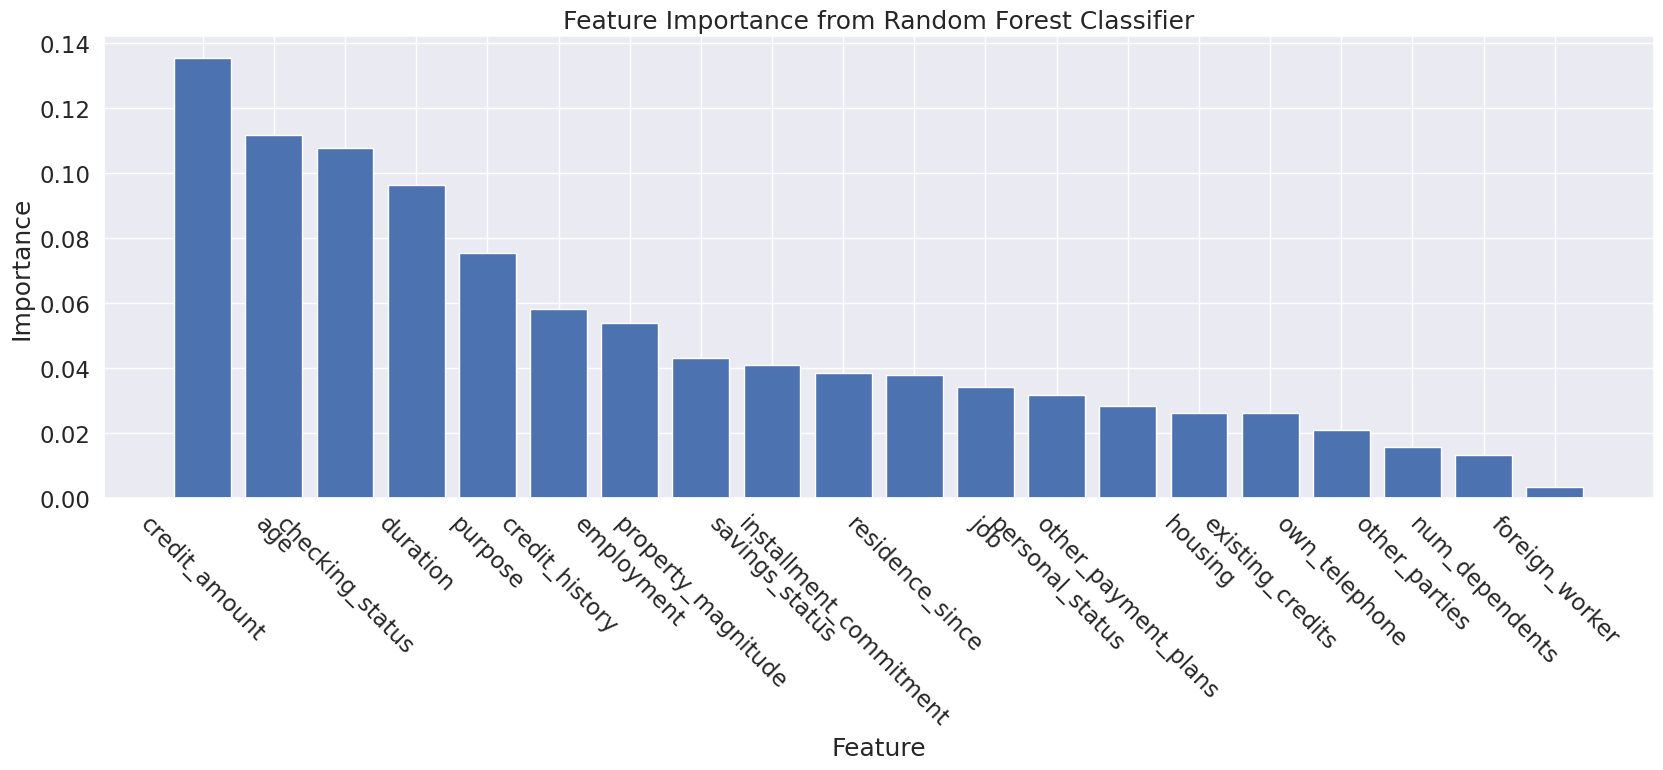

In [ ]:
feature_importances = model.feature_importances_
feature_names = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment', 'installment_commitment',
       'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(20, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=-45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest Classifier")
plt.show()

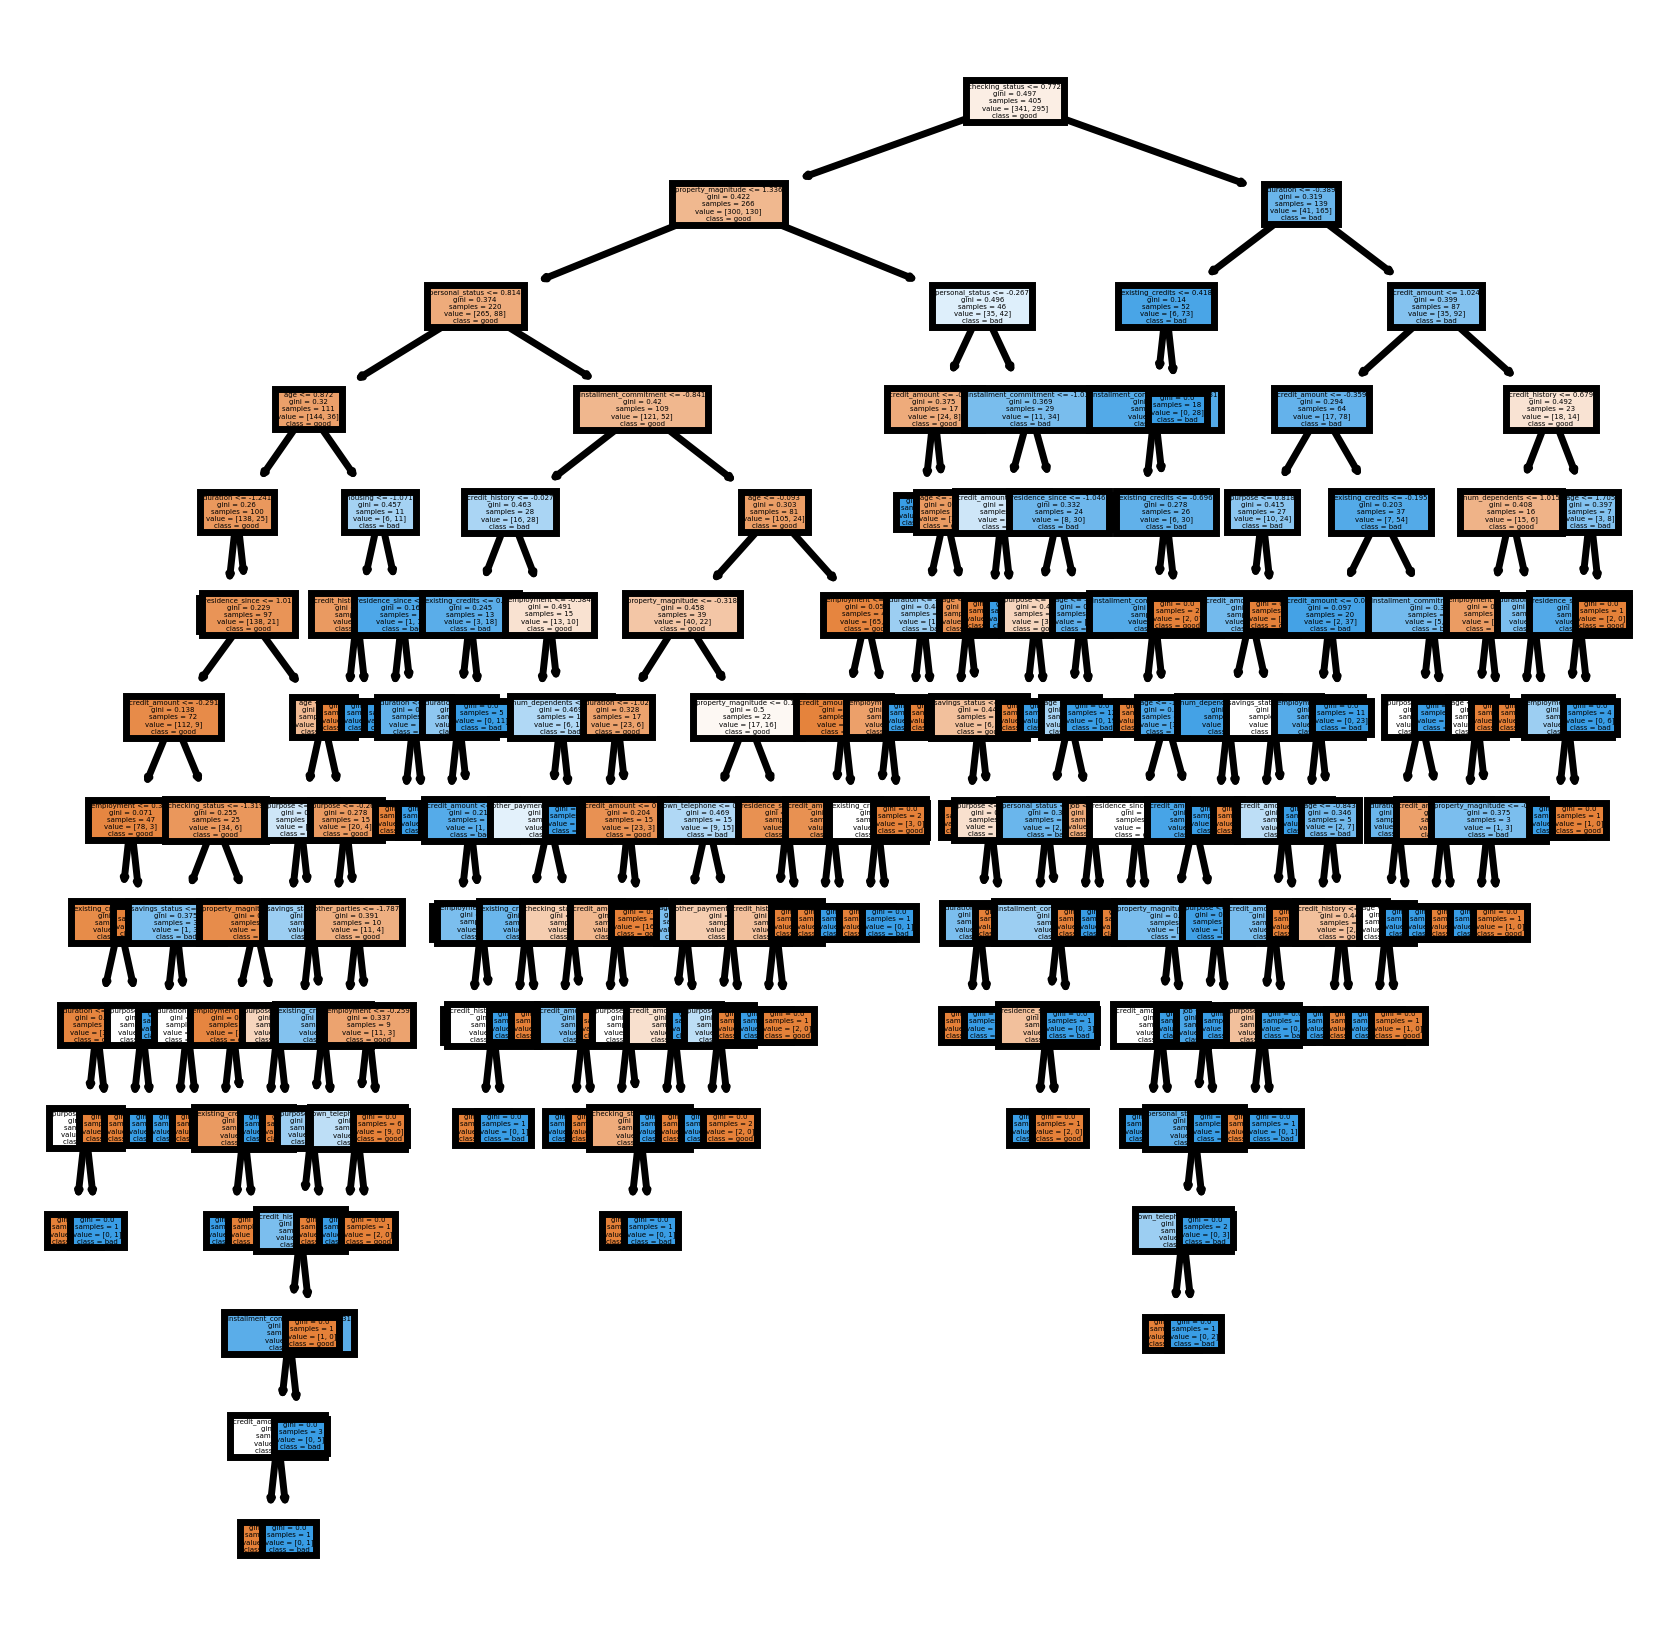

In [ ]:
from sklearn import tree
fn=['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment', 'installment_commitment',
       'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']
cn=['good', 'bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('model_individualtree.png')